Importando Librerias

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors as mcolors
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

Cargando Dataset

In [2]:
data=pd.read_csv(r'https://raw.githubusercontent.com/Ciarzi/DP3_GP1/main/datasets/own_data/test.csv')
data.head()

,loannumber,historial,referido,age,due_per_day,interes,cuenta_corriente,cuenta_otra,cuenta_ahorro,employment
0,4,0,1,38,408,22.5,0,1,0,2
1,10,1,1,36,1466,10.0,0,0,1,2
2,6,0,1,40,816,22.5,0,0,1,2
3,8,1,1,44,1150,15.0,0,0,1,1
4,4,1,1,46,816,22.5,0,0,1,2


In [3]:
data.shape

(1442, 10)

Estandarizando los datos

In [4]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7,8,9
count,1.442000e+03,1.442000e+03,1.442000e+03,1.442000e+03,1.442000e+03,1.442000e+03,1.442000e+03,1.442000e+03,1.442000e+03,1.442000e+03
mean,8.313199e-17,-2.787106e-16,8.583056e-16,4.142164e-17,1.342739e-16,1.324260e-17,8.132268e-17,-4.823542e-17,4.507105e-16,-5.499531e-16
std,1.000347e+00,1.000347e+00,1.000347e+00,1.000347e+00,1.000347e+00,1.000347e+00,1.000347e+00,1.000347e+00,1.000347e+00,1.000347e+00
min,-8.464722e-01,-1.557298e+00,-1.865226e+00,-1.812970e+00,-1.142074e+00,-2.292168e+00,-1.059254e-01,-4.908807e-01,-1.967644e+00,-3.404043e+00
25%,-8.464722e-01,-1.557298e+00,-2.527224e-01,-6.853514e-01,-9.378217e-01,-8.996392e-01,-1.059254e-01,-4.908807e-01,5.082221e-01,4.503975e-01
50%,-3.011906e-01,6.421377e-01,-2.527224e-01,-4.099820e-02,7.734245e-02,9.502415e-02,-1.059254e-01,-4.908807e-01,5.082221e-01,4.503975e-01
75%,5.167318e-01,6.421377e-01,-2.527224e-01,6.033550e-01,2.297695e-01,1.089687e+00,-1.059254e-01,-4.908807e-01,5.082221e-01,4.503975e-01
max,7.878034e+00,6.421377e-01,2.972284e+00,3.664033e+00,4.113611e+00,1.089687e+00,9.440604e+00,2.037155e+00,5.082221e-01,4.503975e-01


Método del Codo

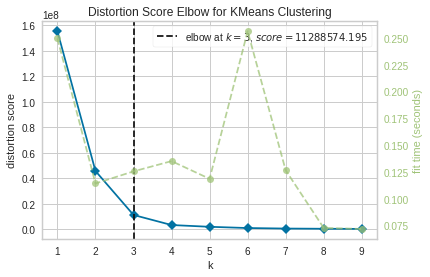

In [5]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10)).fit(data)
visualizer.show()

Aplicando KMEANS

In [6]:
clusters = 3
kmeans = KMeans(n_clusters = clusters)
kmeans.fit(data_scaled)
print(kmeans.labels_)

[2 1 1 ... 1 2 1]


Añadiendo Cluster al Dataset

In [8]:
data['Kmeans_Cluster']=kmeans.labels_
data.head()

,loannumber,historial,referido,age,due_per_day,interes,cuenta_corriente,cuenta_otra,cuenta_ahorro,employment,Kmeans_Cluster
0,4,0,1,38,408,22.5,0,1,0,2,2
1,10,1,1,36,1466,10.0,0,0,1,2,1
2,6,0,1,40,816,22.5,0,0,1,2,1
3,8,1,1,44,1150,15.0,0,0,1,1,1
4,4,1,1,46,816,22.5,0,0,1,2,1


In [10]:
data.to_csv("cluster_test.csv",index=False)

Visualización

PCA con tres componentes

In [11]:
pca = PCA(n_components=3)
pca.fit(data_scaled)
pca_data = pd.DataFrame(pca.transform(data_scaled))
pca_data.head()
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))

Explained variation per principal component: [0.30615559 0.15571701 0.12306676]
Cumulative variance explained by 3 principal components: 58.49%


PCA con 2 componentes --> se desecha con 2 componentes y nos quedamos con el de 3

In [12]:
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(data_scaled)
print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))

print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

Explained variation per principal component: [0.30615559 0.15571701]
Cumulative variance explained by 2 principal components: 46.19%


In [13]:
pd.DataFrame(pca_data).describe()

,0,1,2
count,1.442000e+03,1.442000e+03,1.442000e+03
mean,3.079676e-18,-1.062488e-16,4.326944e-17
std,1.750337e+00,1.248299e+00,1.109739e+00
min,-2.121860e+00,-3.790617e+00,-3.244591e+00
25%,-1.536226e+00,-8.537178e-01,-7.096010e-01
50%,-4.051774e-01,7.553587e-02,-6.618220e-02
75%,8.997200e-01,8.497256e-01,6.406172e-01
max,6.111434e+00,4.363085e+00,4.925192e+00


Generando diferentes colores en order descendente de sus hsv valores

In [14]:
colors = list(zip(*sorted((
					tuple(mcolors.rgb_to_hsv(
						mcolors.to_rgba(color)[:3])), name)
					for name, color in dict(
							mcolors.BASE_COLORS, **mcolors.CSS4_COLORS
													).items())))[1]


# number of steps to taken generate n(clusters) colors
skips = math.floor(len(colors[5 : -5])/clusters)
cluster_colors = colors[5 : -5 : skips]


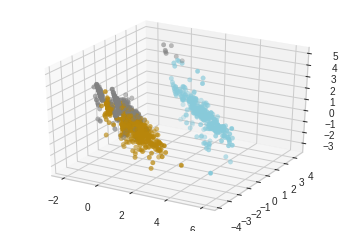

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(pca_data[0], pca_data[1], pca_data[2],
		c = list(map(lambda label : cluster_colors[label],
											kmeans.labels_)))

str_labels = list(map(lambda label:'% s' % label, kmeans.labels_))

list(map(lambda data1, data2, data3, str_label:'', pca_data[0], pca_data[1],
		pca_data[2], str_labels))

plt.show()


Generando mapa de correlación

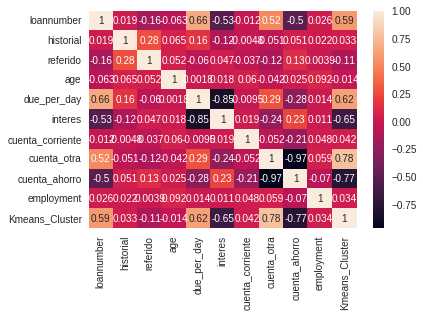

In [16]:
sns.heatmap(data.corr(), annot = True)
plt.show()